In [121]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [122]:
from sklearn.model_selection import train_test_split

df = pd.read_csv('train.csv')
df = df.set_index('ID')

label = df['y']
df.drop('y', axis=1, inplace=True)

df, df_val, y, y_val = train_test_split(df, label, test_size=0.25, random_state=42)

In [123]:
dtype_df = df.dtypes.reset_index()
dtype_df.columns = ["Count", "Column Type"]
print(dtype_df.iloc[:10])
print()
dtype_df = dtype_df.groupby(["Column Type"]).aggregate('count').reset_index()
print(dtype_df)

  Count Column Type
0    X0      object
1    X1      object
2    X2      object
3    X3      object
4    X4      object
5    X5      object
6    X6      object
7    X8      object
8   X10       int64
9   X11       int64

  Column Type  Count
0       int64    368
1      object      8


<AxesSubplot:>

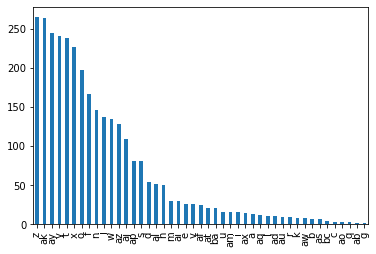

In [124]:
categorical = []

for i in range(len(df.columns)):
    if df[df.columns[i]].dtype.name == 'object':
        categorical.append(df.columns[i])

dist = df[categorical[0]].value_counts().sort_values(ascending=False)
dist.plot.bar()

In [120]:
unique_dict = {}

for col in df.columns:
    if col not in categorical:
        unique_value = str(np.sort(df[col].unique()).tolist())
        temp = unique_dict.get(unique_value, [])
        temp.append(col)
        unique_dict[unique_value] = temp

for k, v in unique_dict.items():
    print(k)
    print(v)
    print()


#Drop Columns with all zeros
zero_cols = unique_dict.get('[0]')
df = df.drop(zero_cols)
df_val = df_val.drop(zero_cols)

[0, 1]
['X10', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20', 'X21', 'X22', 'X23', 'X24', 'X26', 'X27', 'X28', 'X29', 'X30', 'X31', 'X32', 'X33', 'X34', 'X35', 'X36', 'X37', 'X38', 'X39', 'X40', 'X41', 'X42', 'X43', 'X44', 'X45', 'X46', 'X47', 'X48', 'X49', 'X50', 'X51', 'X52', 'X53', 'X54', 'X55', 'X56', 'X57', 'X58', 'X59', 'X60', 'X61', 'X62', 'X63', 'X64', 'X65', 'X66', 'X67', 'X68', 'X69', 'X70', 'X71', 'X73', 'X74', 'X75', 'X76', 'X77', 'X78', 'X79', 'X80', 'X81', 'X82', 'X83', 'X84', 'X85', 'X86', 'X87', 'X88', 'X89', 'X90', 'X91', 'X92', 'X94', 'X95', 'X96', 'X97', 'X98', 'X99', 'X100', 'X101', 'X102', 'X103', 'X104', 'X105', 'X106', 'X108', 'X109', 'X110', 'X111', 'X112', 'X113', 'X114', 'X115', 'X116', 'X117', 'X118', 'X119', 'X120', 'X122', 'X123', 'X124', 'X125', 'X126', 'X127', 'X128', 'X129', 'X130', 'X131', 'X132', 'X133', 'X134', 'X135', 'X136', 'X137', 'X138', 'X139', 'X140', 'X141', 'X142', 'X143', 'X144', 'X145', 'X146', 'X147', 'X148', 'X150', 'X151'

KeyError: "['X11' 'X93' 'X107' 'X233' 'X235' 'X236' 'X268' 'X288' 'X289' 'X290'\n 'X293' 'X295' 'X296' 'X297' 'X319' 'X330' 'X339' 'X347'] not found in axis"

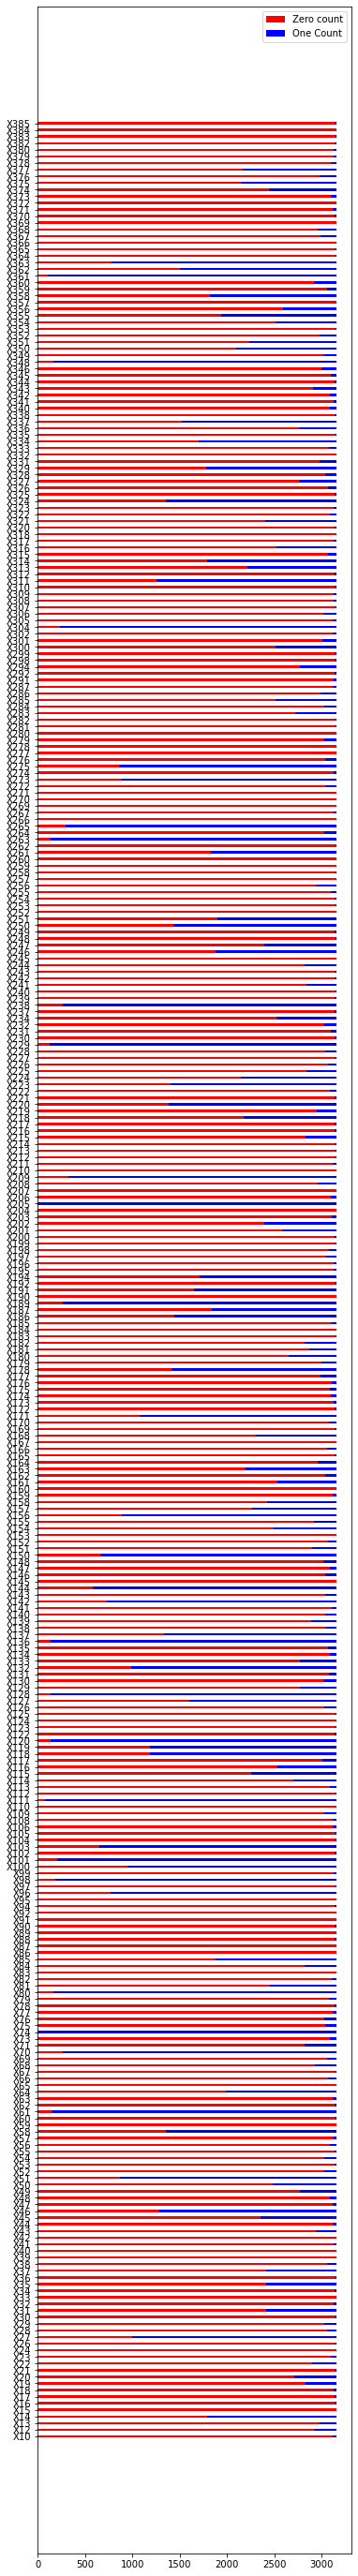

AttributeError: 'DataFrame' object has no attribute 'y'

In [139]:
#Set Categorical Features Apart
categorical_features = df[categorical]
categorical_features

val_categorical_features = df_val[categorical]


#Binary Value Distribution
non_zero_cols = unique_dict['[0, 1]']
zero_counts = []
one_counts = []
for col in non_zero_cols:
    zero_counts.append((df[col]==0).sum())
    one_counts.append((df[col]==1).sum())
    
N = len(non_zero_cols)
ind = np.arange(N)
plt.figure(figsize=(6,50))
p1 = plt.barh(ind, zero_counts, 0.35, color='red')
p2 = plt.barh(ind, one_counts, 0.35, left=zero_counts, color="blue")
plt.yticks(ind, non_zero_cols)
plt.legend((p1[0], p2[0]), ('Zero count', 'One Count'))
plt.show()
plt.show()


In [114]:
#Check for any Null Values
print(df.isnull().sum(axis=0).sort_values(ascending=False).head(5))
#No Null Values

print()
print()
#Remove Categorical from the Original Dataset

df = df.drop(categorical, axis=1)
df_val = df_val.drop(categorical, axis=1)

print("Xtrain", df.head(1))
print("Ytrain", y.head(1))

X0      0
X255    0
X264    0
X263    0
X262    0
dtype: int64


Xtrain       X10  X11  X12  X13  X14  X15  X16  X17  X18  X19  ...  X375  X376  X377  \
ID                                                      ...                     
7547    0    0    0    1    1    0    0    0    0    0  ...     0     0     1   

      X378  X379  X380  X382  X383  X384  X385  
ID                                              
7547     0     0     0     0     0     0     0  

[1 rows x 368 columns]
Ytrain ID
7547    108.2
Name: y, dtype: float64


KeyError: '[[0, 1]]'

0


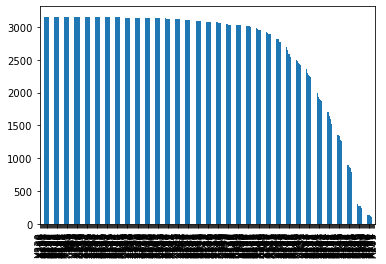

In [8]:
#Zero Features

column_names = df.columns

zero_counts = (df==0).sum(axis=0).sort_values(ascending=False)
zero_counts_val = (df_val==0).sum(axis=0).sort_values(ascending=False)

zero_counts = zero_counts[:-1]
zero_counts_val = zero_counts_val[:-1]

zero_counts.plot.bar()
print(zero_counts[zero_counts > 4000].count())

In [9]:
#Drop Zero Features

sparse_features = zero_counts[zero_counts > 4100].index
sparse_features_val = zero_counts_val[zero_counts_val>4100].index

print(sparse_features)

df = df.drop(sparse_features, axis=1)
df_val = df_val.drop(sparse_features_val, axis=1)
print(df_val)
print(y_val)

Index([], dtype='object')
      X0  X10  X11  X12  X13  X14  X15  X16  X17  X18  ...  X375  X376  X377  \
ID                                                     ...                     
2140  al    0    0    0    0    0    0    0    0    0  ...     0     0     0   
310    f    0    0    0    0    0    0    0    0    0  ...     0     0     0   
4779   j    1    0    0    0    0    0    0    0    0  ...     1     0     0   
385   az    0    0    0    0    0    0    0    1    0  ...     0     0     0   
5180  ak    0    0    0    0    0    0    0    0    0  ...     0     0     0   
...   ..  ...  ...  ...  ...  ...  ...  ...  ...  ...  ...   ...   ...   ...   
565    w    0    0    0    0    1    0    0    0    0  ...     1     0     0   
5538   y    0    0    1    0    0    0    0    0    0  ...     0     0     0   
5666  az    0    0    1    0    0    0    0    0    0  ...     0     0     0   
7543   j    0    0    0    0    1    0    0    0    0  ...     0     0     1   
2948   t    0 

In [10]:
#Extract Numerical Features. No need to Scale

PCA_features = df.iloc[:, 1:]
PCA_features_val = df_val.iloc[:, 1:]

print(PCA_features.head(3))

print("Smallest Value")
print(PCA_features.min().sort_values(ascending=True).head(1))
print()
print("Largest Value")
print(PCA_features.max().sort_values(ascending=False).head(1))


      X10  X11  X12  X13  X14  X15  X16  X17  X18  X19  ...  X375  X376  X377  \
ID                                                      ...                     
7547    0    0    0    1    1    0    0    0    0    0  ...     0     0     1   
5381    0    0    0    0    1    0    0    0    0    0  ...     1     0     0   
2549    0    0    1    0    0    0    0    0    0    0  ...     0     0     0   

      X378  X379  X380  X382  X383  X384  X385  
ID                                              
7547     0     0     0     0     0     0     0  
5381     0     0     0     0     0     0     0  
2549     0     0     0     0     0     0     0  

[3 rows x 368 columns]
Smallest Value
X10    0
dtype: int64

Largest Value
X10    1
dtype: int64


In [33]:
#Perform PCA Var threshold is to be validated

from sklearn.decomposition import PCA

variance_threshold = 71
pca = PCA(n_components = variance_threshold)
pca.fit(PCA_features)
reduced_PCA_features = pca.transform(PCA_features)
reduced_PCA_features = pd.DataFrame(reduced_PCA_features)
reduced_PCA_features

pca.fit(PCA_features_val)
reduced_PCA_features_val = pca.transform(PCA_features_val)
reduced_PCA_features_val = pd.DataFrame(reduced_PCA_features_val)

In [34]:
print(pca.explained_variance_ratio_)
print(pca.singular_values_)
print("Remaining Dimension:", len(pca.singular_values_))

[0.1343524  0.08674761 0.08229924 0.06639626 0.05683099 0.04806584
 0.03930883 0.03300435 0.02746327 0.02733082 0.02454332 0.02005069
 0.01744093 0.01693661 0.01573672 0.01433292 0.01336316 0.01218881
 0.01102201 0.01071835 0.01054009 0.00957927 0.00881563 0.00850192
 0.00810746 0.00783178 0.00727347 0.00701311 0.00660469 0.00626034
 0.00568977 0.00548378 0.00515387 0.00494097 0.00460996 0.00450605
 0.00414812 0.004107   0.00394358 0.00378496 0.00356834 0.00352031
 0.00332854 0.00311906 0.00307971 0.00302066 0.00284892 0.00273465
 0.00256214 0.00251872 0.00246067 0.00237612 0.00229695 0.00223034
 0.0021585  0.00213475 0.00205028 0.00198292 0.00192037 0.00181433
 0.00180198 0.00169214 0.00166047 0.00163476 0.00156459 0.00154224
 0.00148914 0.00145313 0.0014022  0.0013409  0.00130012]
[56.87902304 45.70441549 44.51714656 39.98537881 36.99320836 34.0210471
 30.76624395 28.19129473 25.71612734 25.65403916 24.31062007 21.97324041
 20.49340918 20.1949465  19.46644049 18.57790254 17.93840904 

In [35]:
#Merge with Categorical features

categorical_features.index = list(range(len(reduced_PCA_features)))
val_categorical_features.index = list(range(len(reduced_PCA_features_val)))

df = pd.concat([categorical_features, reduced_PCA_features], axis=1)
print(df.head())
df_val = pd.concat([val_categorical_features, reduced_PCA_features_val], axis=1)
print(df_val.head())

  X1  X2 X3 X4  X5 X6 X8         0         1         2  ...        61  \
0  s  as  a  d   v  l  t -1.960588  1.070596  2.395769  ... -0.423283   
1  s  as  e  d   m  j  e -1.625191  0.035866  0.503722  ...  0.492119   
2  r  ak  f  d  ac  g  o  0.897316 -0.344157 -2.146326  ... -0.093422   
3  b  ae  c  d   n  b  m  2.530759  0.089503  1.807132  ...  0.407494   
4  s  as  c  d   d  j  q -2.808520 -0.339913  0.811773  ... -0.089353   

         62        63        64        65        66        67        68  \
0  0.040577  0.464906 -0.457457  0.054584  0.011782 -0.292063 -0.099732   
1 -0.159355 -0.015800  0.005713 -0.096868  0.039810  0.161944  0.082493   
2  0.194736 -0.074303 -0.180298  0.022907  0.072341  0.289824 -0.028712   
3  0.141724  0.081115 -0.389980 -0.037938  0.179361  0.204228  0.286053   
4  0.048839  0.022872  0.101766  0.005092  0.117049 -0.028278  0.063537   

         69        70  
0 -0.081852  0.208772  
1 -0.074972 -0.234899  
2 -0.101197 -0.103340  
3 -0.327519  0

In [36]:
#Two types of Encoder for CV

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()

def LabelEncoding(df):
    new_df = df
    for i in categorical:
        new_df[i] = new_df[i].astype('category')
        new_df[i] = new_df[i].cat.codes
    new_df[categorical] = scaler.fit_transform(new_df[categorical])
        
    return new_df

def OneHotEncoding(df):
    new_df = pd.DataFrame()
    for c in categorical:
        new_df = pd.concat([new_df, pd.get_dummies(categorical_features[c], prefix=c)], axis=1)
        #print(pd.get_dummies(categorical_features[c], prefix=c))
    return new_df

In [37]:
Label_encoded_df = LabelEncoding(df)
print(Label_encoded_df.head(3))

One_hot_encoded_df = OneHotEncoding(df[categorical])
#One_hot_encoded = One_hot_encoded_df.drop([categorical])
print(One_hot_encoded_df.head(3))

Label_encoded_df_val = LabelEncoding(df_val)
One_hot_encoded_df_val = OneHotEncoding(df_val[categorical])

         X1        X2        X3   X4        X5        X6        X8         0  \
0  0.769231  0.380952  0.000000  1.0  0.892857  1.000000  0.791667 -1.960588   
1  0.769231  0.380952  0.666667  1.0  0.607143  0.818182  0.166667 -1.625191   
2  0.730769  0.190476  0.833333  1.0  0.071429  0.545455  0.583333  0.897316   

          1         2  ...        61        62        63        64        65  \
0  1.070596  2.395769  ... -0.423283  0.040577  0.464906 -0.457457  0.054584   
1  0.035866  0.503722  ...  0.492119 -0.159355 -0.015800  0.005713 -0.096868   
2 -0.344157 -2.146326  ... -0.093422  0.194736 -0.074303 -0.180298  0.022907   

         66        67        68        69        70  
0  0.011782 -0.292063 -0.099732 -0.081852  0.208772  
1  0.039810  0.161944  0.082493 -0.074972 -0.234899  
2  0.072341  0.289824 -0.028712 -0.101197 -0.103340  

[3 rows x 78 columns]
   X1_a  X1_aa  X1_ab  X1_b  X1_c  X1_d  X1_e  X1_f  X1_g  X1_h  ...  X8_p  \
0     0      0      0     0     0     0  

In [49]:
#Random Forest, SVM to perform Regression

from sklearn.ensemble import RandomForestRegressor
from sklearn import svm

rf_regressor = RandomForestRegressor(max_depth=30, random_state=0)
rf_regressor.fit(Label_encoded_df, y)

svm_regressor = svm.SVR()
svm_regressor.fit(Label_encoded_df, y)

SVR()

In [ ]:
#Try 2

In [173]:
import xgboost as xgb

train_df = pd.read_csv("../input/train.csv")
test_df = pd.read_csv("../input/test.csv")

for f in ["X0", "X1", "X2", "X3", "X4", "X5", "X6", "X8"]:
        lbl = preprocessing.LabelEncoder()
        lbl.fit(list(train_df[f].values)) 
        train_df[f] = lbl.transform(list(train_df[f].values))

train_y = train_df['y'].values

def xgb_r2_score(preds, dtrain):
    labels = dtrain.get_label()
    return 'r2', r2_score(labels, preds)

xgb_params = {
    'eta': 0.05,
    'max_depth': 6,
    'subsample': 0.7,
    'colsample_bytree': 0.7,
    'objective': 'reg:linear',
    'silent': 1
}
dtrain = xgb.DMatrix(train_X, train_y, feature_names=train_X.columns.values)
model = xgb.train(dict(xgb_params, silent=0), dtrain, num_boost_round=100, feval=xgb_r2_score, maximize=True)

# plot the important features #
fig, ax = plt.subplots(figsize=(12,18))
xgb.plot_importance(model, max_num_features=50, height=0.8, ax=ax)
plt.show()

ModuleNotFoundError: No module named 'xgboost'